In [1]:
import pandas as pd #initailse libraies(load dataset in form of data fram)
import matplotlib.pyplot as plt #libraies help withdata visualisation
import numpy as np

In [2]:
cc = pd.read_csv("C:\\Users\\Shirley\\Downloads\\User0_credit_card_transactions.csv")

In [3]:
cc.head()

,User,Card,Year,Month,Day,Time,Amount,Merchant Name,Zip,MCC,Class
0,0,0,2002,9,1,06:21,134.09,3.527210e+18,91750.0,5300,0
1,0,0,2002,9,1,06:42,38.48,-7.276120e+17,91754.0,5411,0
2,0,0,2002,9,2,06:22,120.34,-7.276120e+17,91754.0,5411,0
3,0,0,2002,9,2,17:45,128.95,3.414530e+18,91754.0,5651,0
4,0,0,2002,9,3,06:23,104.71,5.817220e+18,91750.0,5912,0


In [4]:
cc.shape #displays record and columns

(19963, 11)

In [5]:
cc.describe() #gives statistical info of datasat

,User,Card,Year,Month,Day,Amount,Merchant Name,Zip,MCC,Class
count,19963.0,19963.000000,19963.000000,19963.000000,19963.000000,19963.000000,1.996300e+04,18316.000000,19963.000000,19963.000000
mean,0.0,1.910735,2011.011922,6.568101,15.743876,81.299989,7.825657e+17,88812.744922,5617.940239,0.001353
std,0.0,1.237763,5.048146,3.477497,8.801378,94.159093,4.040602e+18,13711.491085,707.982901,0.036752
min,0.0,0.000000,2002.000000,1.000000,1.000000,-499.000000,-9.179790e+18,1012.000000,1711.000000,0.000000
25%,0.0,0.000000,2007.000000,4.000000,8.000000,36.630000,-1.288080e+18,91750.000000,5311.000000,0.000000
50%,0.0,2.000000,2011.000000,7.000000,16.000000,69.450000,8.384250e+17,91750.000000,5499.000000,0.000000
75%,0.0,3.000000,2015.000000,10.000000,23.000000,125.680000,4.060650e+18,91752.000000,5912.000000,0.000000
max,0.0,4.000000,2020.000000,12.000000,31.000000,1409.400000,9.137770e+18,99504.000000,9402.000000,1.000000


In [6]:
#creating variables
not_fraud=len(cc[cc.Class==0])
fraud=len(cc[cc.Class==1])

In [7]:
fraud_percent=(fraud/(fraud+not_fraud))*100
fraud_percent 
#percent of fraud detected out of 100 0.13 fraud

0.13525021289385364

In [8]:
#normalization removing impact from data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #calling

In [9]:
cc['Normalized_amount']=scaler.fit_transform(cc["Amount"].values.reshape(-1,1))

In [10]:
cc.drop(["Amount"],inplace=True,axis=1) #deleting columns

In [11]:
cc.head()

,User,Card,Year,Month,Day,Time,Merchant Name,Zip,MCC,Class,Normalized_amount
0,0,0,2002,9,1,06:21,3.527210e+18,91750.0,5300,0,0.560661
1,0,0,2002,9,1,06:42,-7.276120e+17,91754.0,5411,0,-0.454774
2,0,0,2002,9,2,06:22,-7.276120e+17,91754.0,5411,0,0.414628
3,0,0,2002,9,2,17:45,3.414530e+18,91754.0,5651,0,0.506071
4,0,0,2002,9,3,06:23,5.817220e+18,91750.0,5912,0,0.248628


In [12]:
#cleaning the data
cc.isnull().sum() #isnull is function name and doing summation of it

User                    0
Card                    0
Year                    0
Month                   0
Day                     0
Time                    0
Merchant Name           0
Zip                  1647
MCC                     0
Class                   0
Normalized_amount       0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer #class to fill missing values
imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
imputer = imputer.fit(cc)
cc.iloc[:,:] = imputer.transform(cc)
cc

,User,Card,Year,Month,Day,Time,Merchant Name,Zip,MCC,Class,Normalized_amount
0,0,0,2002,9,1,06:21,3.527210e+18,91750.0,5300,0,0.560661
1,0,0,2002,9,1,06:42,-7.276120e+17,91754.0,5411,0,-0.454774
2,0,0,2002,9,2,06:22,-7.276120e+17,91754.0,5411,0,0.414628
3,0,0,2002,9,2,17:45,3.414530e+18,91754.0,5651,0,0.506071
4,0,0,2002,9,3,06:23,5.817220e+18,91750.0,5912,0,0.248628
...,...,...,...,...,...,...,...,...,...,...,...
19958,0,4,2009,2,12,13:03,4.060650e+18,91750.0,5411,0,-0.760328
19959,0,4,2009,2,22,11:58,-8.129520e+18,91750.0,5211,0,-0.566715
19960,0,4,2009,2,24,16:53,5.474320e+18,90250.0,5912,0,-0.715084
19961,0,4,2009,3,29,16:30,4.060650e+18,91750.0,5411,0,-0.711898


In [14]:
cc["Time"]=pd.to_datetime(cc["Time"], format='%H:%M').dt.hour #extracting the hour component of a datetime column 
#split data in train and test
#for all independent variables
x=cc.drop(["Class"],axis=1)
#for all dependent variables
y=cc["Class"]

In [15]:
#spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)#0.3 means 70-30 partition

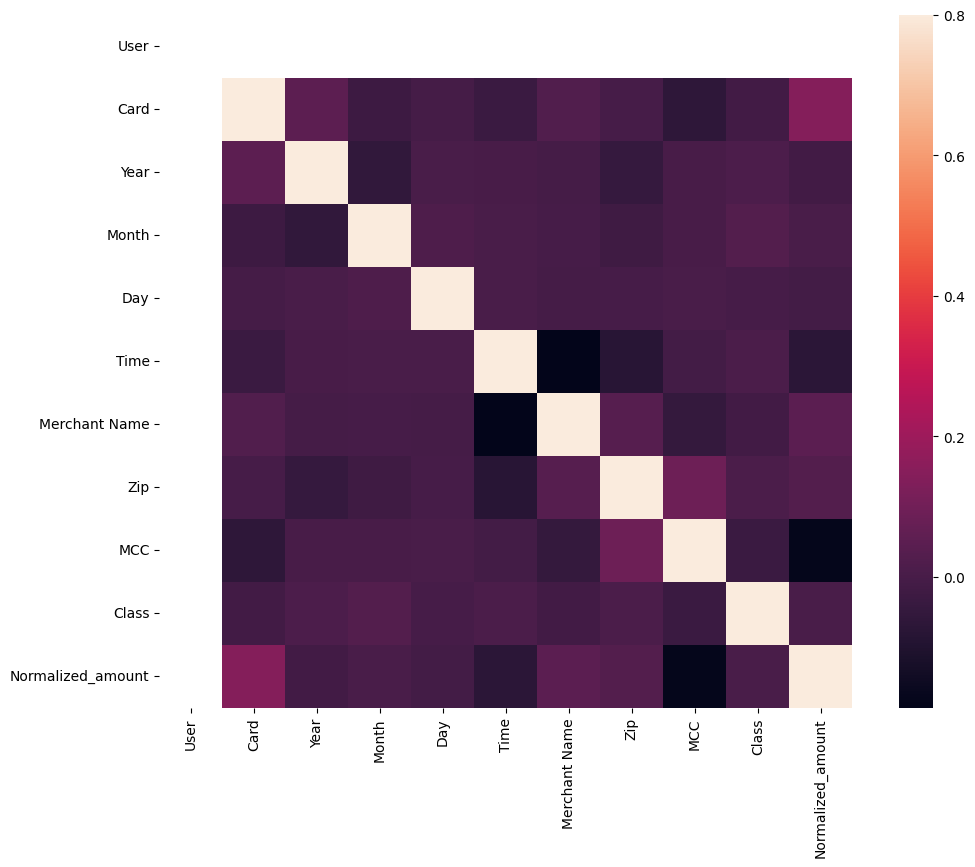

In [16]:
#visualizing the pairwise correlation between the columns
import seaborn as sns
corrmat = cc.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [17]:
x_train.shape #create the model

(13974, 10)

In [18]:
x_test.shape #test the model

(5989, 10)

In [19]:
#create a model 
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf1 = RandomForestClassifier(n_estimators=20000)

In [21]:
rf1.fit(x_train, y_train) #pass train dataset

RandomForestClassifier(n_estimators=20000)

In [22]:
prediction_rf=rf1.predict(x_test) #function to predict

In [23]:
rf_score=rf1.score(x_test,y_test)*100

In [24]:
rf_score

99.83302721656369

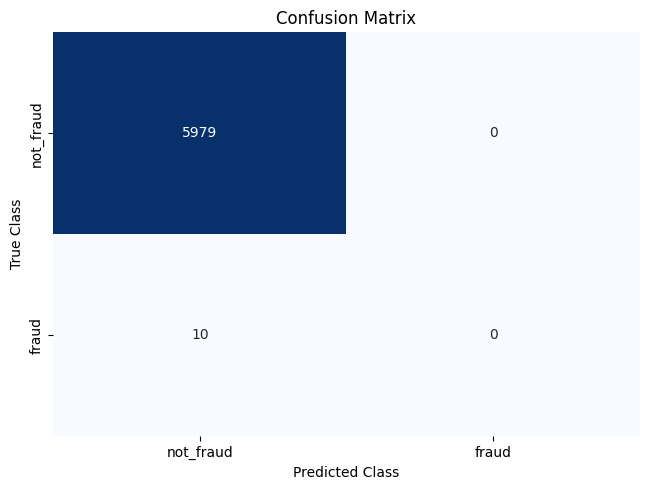

In [25]:
from sklearn.metrics import confusion_matrix
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, prediction_rf)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [26]:
import tkinter as tk
from tkinter import messagebox
from datetime import datetime

In [ ]:
# Define the tkinter window
window = tk.Tk()
window.title("Credit Card Transfer")

# Define the labels for the input fields
year_label = tk.Label(window, text="Year of Expiration ")
month_label = tk.Label(window, text="Month of Expiration")
day_label = tk.Label(window, text="Day of Expiration")
time_label = tk.Label(window, text="Enter current Time")
merchant_label = tk.Label(window, text="Credit Card Number")
zip_label = tk.Label(window, text="Zip Number")
mcc_label = tk.Label(window, text="MCC")
amount_label = tk.Label(window, text="Amount to transfer")

# Define the entry fields for the input values
year_entry = tk.Entry(window)
month_entry = tk.Entry(window)
day_entry = tk.Entry(window)
time_entry = tk.Entry(window)
merchant_entry = tk.Entry(window)
zip_entry = tk.Entry(window)
mcc_entry = tk.Entry(window)
amount_entry = tk.Entry(window)

# Define the submit button
def check_transaction():
    # Get the values entered by the user
    year_val = year_entry.get()
    month_val = month_entry.get()
    day_val = day_entry.get()
    time_val = time_entry.get()
    merchant_val = merchant_entry.get()
    zip_val = zip_entry.get()
    mcc_val = mcc_entry.get()
    amount_val = amount_entry.get()
    
    # Validate the input values
    try:
        year_val = int(year_val)
        month_val = int(month_val)
        day_val = int(day_val)
        zip_val = int(zip_val)
        time_val = int(time_val.split(':')[0])
    except ValueError:
        mcc_val = int(mcc_val)
        amount_val = float(amount_val)
    except ValueError:
        tk.messagebox.showerror("Error", "Invalid input!")
        return
    
    # Create a new transaction record with the input values
    transaction = pd.DataFrame({
        "User": [0],
        "Card": [0],
        "Year": [year_val],
        "Month": [month_val],
        "Day": [day_val],
        "Time": [time_val],
        "Merchant Name": [merchant_val],
        "Zip": [zip_val],
        "MCC": [mcc_val],
        "Class": [1],
        "Normalized_amount": [amount_val]
    })
    
    # Use the trained model to predict the transaction class
    prediction = rf1.predict(transaction.drop(["Class"], axis=1))
    
    # Show the prediction result
    if prediction == 1:
        tk.messagebox.showwarning("Warning", "Fraudulent transaction detected!")
    else:
        tk.messagebox.showinfo("Success", "Transaction approved.")

submit_button = tk.Button(window, text="Submit", command=check_transaction)

# Place the labels and entry fields in the window

year_label.grid(row=2, column=0)
year_entry.grid(row=2, column=1)
month_label.grid(row=3, column=0)
month_entry.grid(row=3, column=1)
day_label.grid(row=4, column=0)
day_entry.grid(row=4, column=1)
time_label.grid(row=5, column=0)
time_entry.grid(row=5, column=1)
merchant_label.grid(row=6, column=0)
merchant_entry.grid(row=6, column=1)
zip_label.grid(row=7, column=0)
zip_entry.grid(row=7, column=1)
mcc_label.grid(row=8, column=0)
mcc_entry.grid(row=8, column=1)
amount_label.grid(row=9, column=0)
amount_entry.grid(row=9, column=1)
submit_button.grid(row=11, column=1)


window.mainloop()